In [2]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn
import matplotlib.dates as md
from matplotlib import pyplot as plt
from sklearn import preprocessing
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import time
import pandas as pd
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
from numpy import where
from sklearn.neighbors import NearestNeighbors

## Import data

In [20]:
data = pd.read_csv("temp_abnormal.csv")
df = data[["time","temperature","number"]]

In [21]:
df.head()

,time,temperature,number
0,1/1/2021 0:00,97.500000,0
1,1/1/2021 0:10,97.476441,1
2,1/1/2021 0:20,97.452898,2
3,1/1/2021 0:30,97.429387,3
4,1/1/2021 0:40,97.405924,4


## Plot data

<ipython-input-22-5106cac12afd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time'] = pd.to_datetime(df['time'])


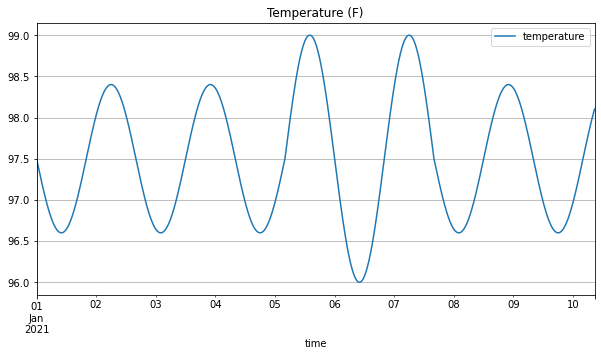

In [22]:
figsize=(10,5)
df['time'] = pd.to_datetime(df['time'])
df.plot(x='time', y='temperature', figsize=figsize, title='Temperature (F)');
plt.grid();
plt.show();

## K-Nearest Neighbors 

In [60]:
X = df[["number","temperature"]].values

nbrs = NearestNeighbors(n_neighbors = 2)
nbrs.fit(X)


NearestNeighbors(n_neighbors=2)

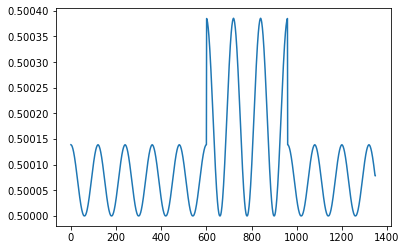

In [61]:
# distances and indexes of k-neaighbors from model outputs
distances, indexes = nbrs.kneighbors(X)
# plot mean of k-distances of each observation
plt.plot(distances.mean(axis =1))

In [71]:
# visually determine cutoff values > 0.15
outlier_index = np.where(distances.mean(axis = 1) > 0.50014)
outlier_index

(array([601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613,
        614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626,
        627, 628, 629, 630, 631, 632, 633, 634, 686, 687, 688, 689, 690,
        691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703,
        704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716,
        717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729,
        730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742,
        743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 806,
        807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819,
        820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832,
        833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845,
        846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858,
        859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871,
        872, 873, 874, 926, 927, 928, 929, 930, 931

In [72]:
# filter outlier values
outlier_values = df.iloc[outlier_index]
outlier_values

,time,temperature,number
601,2021-01-05 04:10:00,97.539265,601
602,2021-01-05 04:20:00,97.578504,602
603,2021-01-05 04:30:00,97.617689,603
604,2021-01-05 04:40:00,97.656793,604
605,2021-01-05 04:50:00,97.695789,605
...,...,...,...
955,2021-01-07 15:10:00,97.695789,955
956,2021-01-07 15:20:00,97.656793,956
957,2021-01-07 15:30:00,97.617689,957
958,2021-01-07 15:40:00,97.578504,958


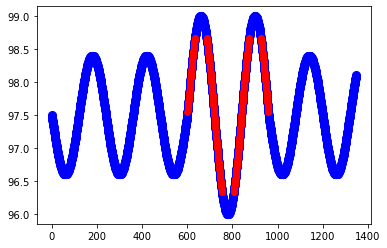

In [75]:
# plot data
plt.scatter(df["number"], df["temperature"], color = "b", s = 65,)
# plot outlier values
plt.scatter(outlier_values["number"], outlier_values["temperature"], color = "r")

This model can detect anomalies as they start!

## OneClassSVM

In [9]:
# model specification
model = OneClassSVM(kernel = 'rbf', gamma = 0.001, nu = 0.03).fit(df[['number', 'temperature']])

In [10]:
# prediction
y_pred = model.predict(df[['number', 'temperature']])
y_pred

array([-1,  1,  1, ...,  1,  1, -1], dtype=int64)

In [11]:
# filter outlier index
outlier_index = where(y_pred == -1) 
# filter outlier values
outlier_values = df.iloc[outlier_index]
outlier_values

,time,temperature,number,Unnamed: 3
0,2021-01-01 00:00:00,97.500000,0,NaN
70,2021-01-01 11:40:00,96.630667,70,NaN
71,2021-01-01 11:50:00,96.637062,71,NaN
72,2021-01-01 12:00:00,96.644049,72,NaN
73,2021-01-01 12:10:00,96.651623,73,NaN
...,...,...,...,...
1277,2021-01-09 20:50:00,96.687673,1277,NaN
1278,2021-01-09 21:00:00,96.698094,1278,NaN
1279,2021-01-09 21:10:00,96.709065,1279,NaN
1280,2021-01-09 21:20:00,96.720577,1280,NaN


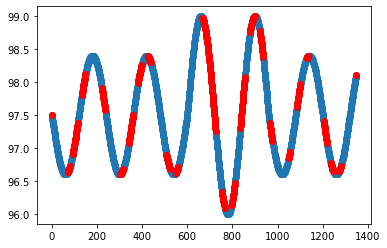

In [12]:
# visualize outputs
plt.scatter(df["number"], df["temperature"])
plt.scatter(outlier_values["number"], outlier_values["temperature"], c = "r")